In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw1.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science
## Homework 1: Webscraping, Pandas, and EDA

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import pyarrow as pa # optional
import seaborn as sns
import matplotlib.pyplot as plt
import re
import io
import os.path
import json
import time
import glob
import asyncio # optional
import aiohttp # optional
from IPython.core.display import HTML
from IPython import display

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

In [5]:
style = '''<style>
h3, h4 {
    background-color: #7efcf5;
    border-left: 5px solid #7ec4fc;
    border-right: 5px solid #7ec4fc;
    padding: 0em;
}
h3 {
    background-color: #7efcf5;
    border-top: 5px solid #7ec4fc;
    border-left: 5px solid #7ec4fc;
    border-right: 5px solid #7ec4fc;
    padding: 0.5em;
}
p {
    padding: 0.5em;
    max-width: 34em;
    font-weight:400;
}
.md {
    max-width: 80ch;

}
.prompt {    
    background-color: lightgreen;
    border-color: #dFb5b4;
    border-left: 5px solid #f57efc;
    padding: 0.5em;
    font-weight:500;
    }
 </style>'''
HTML(style)

## Assignment Overview

You'll be working with data from screenboston.com, a website that aggregates movie screenings from various theaters in the Boston area. Your task is to collect this data, enrich it with information from Wikipedia, and then analyze and visualize the results.

## Assignment Structure

The assignment is divided into 8 main questions, each building upon the previous ones, followed by a wrap-up:

1. Fetching HTML from screenboston.com (10 pts)
2. Parsing HTML into structured data (15 pts)
3. Augmenting data with historical snapshots (15 pts)
4. Creating and manipulating a Pandas DataFrame (15 pts)
5. Initial exploratory data analysis and visualization (15 pts)
6. Finding Wikipedia pages for each screened film (7 pts)
7. Storing Wikipedia HTML in the DataFrame (3 pts)
8. Extracting and analyzing data from Wikipedia pages (15 pts)
9. Wrap-up (5 pts)

As you progress through these steps, you'll be transforming raw web data into a rich dataset ready for analysis. By the end, you'll have created a comprehensive overview of Boston's movie screening landscape, potentially uncovering interesting trends and patterns in the process. 

<div style = "background: #f0f0f0; border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output. Or better yet, avoid overly long output altogether.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>


<div class=md>
<h3>1. Getting HTML from screenboston.com</h3>

<p>Our first step is to get the HTML content from the page at screenboston.com for analysis. To avoid having to make unnecessary future requests, you should write the content to disk.</p>



<div class=prompt>
    
1. Use the `requests` library to get the html located at screenboston.com.
1. Save it in the file `data/html/screenboston.html`.

**Your code should only make an HTTP request if the file does not already exist.** 

**Hint:** the `os.path.isfile()` function can be used check if a file exists.
</div>
</div>


In [6]:
file_path = './data/html/screenboston.html'

response = requests.get('https://screenboston.com') #get info from url
response.raise_for_status()  # Check for any errors

# Save the HTML content to a file
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'w', encoding='utf-8') as file:  # 'w' => write file
    file.write(response.text)

with open(file_path, 'r', encoding='utf-8') as file: #'r' => read file
    content = file.read()

soup = BeautifulSoup(content, 'html.parser')


In [7]:
#after grader check failed
#beautiful soup html parser?
#OH said just windows issue

In [8]:
grader.check("q1")

q1 results:
    q1 - 1 result:
        ✅ Test case passed

    q1 - 2 result:
        ❌ Test case failed
        Trying:
            expected_url = './data/html/screenboston.html'
        Expecting nothing
        ok
        Trying:
            with open(expected_url, 'r') as f:
                content = f.read()
                s = BeautifulSoup(content)
                assert s.select_one('p').text == 'Screen Boston', f'Content of file saved from {expected_url} should contain a <p> tag with the page name.'
        Expecting nothing
        **********************************************************************
        Line 2, in q1 1
        Failed example:
            with open(expected_url, 'r') as f:
                content = f.read()
                s = BeautifulSoup(content)
                assert s.select_one('p').text == 'Screen Boston', f'Content of file saved from {expected_url} should contain a <p> tag with the page name.'
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1 1[1]>", line 2, in <module>
                content = f.read()
                          ^^^^^^^^
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 23, in decode
                return codecs.charmap_decode(input,self.errors,decoding_table)[0]
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 222013: character maps to <undefined>

    q1 - 3 result:
        ✅ Test case passed

<div class=md>
<h3>2. Parsing HTML into an Efficient Data Structure</h3>

<p>Were you to open this HTML file in an editor, you'd find it wouldn't make for light reading.
There's a lot of text in there, but we're currently only interested in a small portion of it. Thankfully, this small portion's constituant occurances appear in a mostly predictable way.
</p>

<div class='prompt'>
1. Parse the HTML page to produce an iterable of dictionaries called <code>movies</code>. Here is one possible example:
<div style="max-width:30em;padding:1em">
    
```python
{'title': 'Monty Python and the Holy Grail',
 'directors': 'Terry Jones, Terry Gilliam',
 'year': 1975,
 'genre': 'Adventure',
 'runtime': '1h 31m',
 'theater': 'Coolidge Corner Theater',
 'screen_date': '2024-08-17'
 'screen_times': '11:59 PM'}
```
</div>

2. Report the number of dictionaries in your iterable.
3. Display an example dictionary.
</div>

<p>
<b>One possible approach:</b> leveraging the structure of the page, use BeautifulSoup to divide it into disjoint peices of the HTML tree, each containing the set of information outlined above for each title's screening date at a given theater. Each peice is processed by a helper function(s) which extracts the desired fields and assemples them into a dictionary. These dictionaries are then accumulated in some iterable such as a list.
</p>

**Hints:**
- Your browser's 'inspect' tool is very useful for exploring a page's structure.
- To maintain a uniform set of keys across all movie dictionaries, use the plural 'directors' even for movies which attribute only a single director. 
</div>
</div>

In [9]:
#your code here
allDays = soup.find_all("div", class_="max-w-screen", id = True)
movies = []

for day in allDays:
    for oneMovie in day.find_all("button", class_="w-full h-auto max-w-full text-left"):
        for times in oneMovie.find_all("div", class_="flex gap-[6px]"):
            listOfTimes = times.find_all("p", class_="")
            movie = {'title': oneMovie.find_all("p", class_="big whitespace-normal w-full min-w-0 overflow-hidden")[0].text,
                    'directors': oneMovie.find_all("p", class_="")[0].text,
                    'year': int(oneMovie.find_all("p", class_="")[1].text.split(",")[0]),
                    'genre': oneMovie.find_all("p", class_="")[1].text.split(",")[1],
                    'runtime': oneMovie.find_all("p", class_="")[1].text.split(",")[-1].strip(),
                    'theater': oneMovie.find_all("p", class_=False)[0].text,
                    'screen_date': day.find_all("p", class_="small")[0].text,
                    'screen_times': ' '.join([t.get_text().strip() for t in listOfTimes])}
        
            
            movies.append(movie)
            
print(f"Length of dictionary: {len(movies)}")
print(f"Example Dictionary: {movies[11]}")




Length of dictionary: 114
Example Dictionary: {'title': 'Easy A', 'directors': 'Will Gluck', 'year': 2010, 'genre': ' Comedy', 'runtime': '1h 33m', 'theater': 'Coolidge Corner Theatre', 'screen_date': 'Thursday, September 26', 'screen_times': '7:00 PM'}


In [10]:
# IDEAS
# try .prettify over max-...
# some p tags do have class attr with info there. 
# AND text within p tag (date has 4 digits) (give p tag where text has 4 digits)
# tag.select('p') also gives all 'p's inside of div block for BS objects
# tag.select('p .blah #some-id')
# tag.find_all('p', attrs={'class': "}"}) for empty classese
# tag.get('class') gets class for outermost div
# can loop over p tags with .get('class') 
# conditionals for div convention of inconsistencies 

# NOTES
# 2 movies without genre listed (webpage update)
# if 2 items (instead of 3), insert 'none' at 2nd position (to avoid NA for genre)



In [11]:
movies

[{'title': '8Â½',
  'directors': 'Federico Fellini',
  'year': 1963,
  'genre': ' Drama',
  'runtime': '2h 19m',
  'theater': 'The Brattle',
  'screen_date': 'Tuesday, September 24',
  'screen_times': '4:00 PM 7:00 PM'},
 {'title': 'Strangers on a Train',
  'directors': 'Alfred Hitchcock',
  'year': 1951,
  'genre': ' Crime',
  'runtime': '1h 41m',
  'theater': 'Somerville Theatre',
  'screen_date': 'Tuesday, September 24',
  'screen_times': '7:00 PM'},
 {'title': 'Join or Die',
  'directors': 'Pete Davis, Rebecca Davis',
  'year': 2024,
  'genre': ' Documentary',
  'runtime': '1h 39m',
  'theater': 'Coolidge Corner Theatre',
  'screen_date': 'Tuesday, September 24',
  'screen_times': '7:00 PM'},
 {'title': 'The Seventh Seal',
  'directors': 'Ingmar Bergman',
  'year': 1957,
  'genre': ' Fantasy',
  'runtime': '1h 36m',
  'theater': 'Mount Auburn Cemetery',
  'screen_date': 'Tuesday, September 24',
  'screen_times': '7:00 PM'},
 {'title': "Bill & Ted's Bogus Journey",
  'directors': 'P

In [12]:
# test cell

# title = soup.find('p', class_ = "big whitespace-normal w-full min-w-0 overflow-hidden")
# title.text

In [13]:
grader.check("q2")

q2 results: All test cases passed!

<div class=md>
    <h3>3. Adding Historical Data: Snapshots from the Internet Archive's Wayback Machine</h3>
<p>
The screenboston.com page only shows screenings scheduled from the current day until about 2-4 weeks into the future.
Using the <a href="http://web.archive.org/">Wayback Machine</a>, we can augment our dataset with past snapshots of the page  
</p>

<p>
Rather than clicking around to download each snapshot manually, we should again acquire our pages programmatically using <code>requests</code>. The Internet Archive offers an <a href='https://archive.org/help/wayback_api.php'>API</a> where you can specify a URL and timestamp and receive a JSON object which contains a new URL to a snapshot of the desired page nearest to the provided timestamp. You can then use <code>requests</code> again to acquire the HTML of this snapshot.
</p>
    
<div class=prompt>

1. Acquire enough snapshots to cover all days from Jan through September 2024 for which there exists data. 
For simplicity we'll assume that any well-formed screenboston.com page will cover at least through the end of that month and that a day's schedule won't change once displayed.
2. Write each snapshot's HTML content to disk in the `/data/html` directory using filenames of the form `'snapshot_YYYYMMDD.html'`. Your code should only make requests if no local snapshot files already exist.
3. Using your parsing function from the previous section, add movie dictionaries extracted from all the snapshots to your list, `movies`. Save this list of dictionaries as 'data/movies.json'. You should only perform the parsing if the JSON file does not already exist. Don't worry about any duplicate movie screenings in your list at this point.

</div>

**Hints:**
- When retrieving JSON content with <code>requests</code>, us the `json()` method rather than the `text` attribute to extract the content from the returned request object into a nested dictionary rather than a string.
- APIs often take parameters as key-value pairs occuring after a '?' character in the URL. For example 'http://archive.org/wayback/available?url=example.com&timestamp=20060101' includes a 'url' and a 'timestamp' parameter. When using <code>requests.get()</code> you can exclude these parameters from the URL itself and instead pass them as a dictionary to an argument called 'params'.
- Use <code>json.dump()</code> and <code>json.load()</code> from the imported <code>json</code> module for writing and reading JSON content.

In [14]:
# your code here

# ideas from OH
# #snapshot request
# r = requests.get(url, params) #params say what query is
# d= r.json() # get json file
# ss_url = d[''][''] #square bracket dict notation pulls out url of snapshot
# html = requests.get(ss_url).text()
# do not loop by day
# loop over months (firs t day)... 
# May July and September is reasonable: but must be > 300 movies

#create helper functions
from datetime import datetime, timedelta

def fetch_wayback_snapshot(url, date):
    """
    Fetches the snapshot URL from the Wayback Machine based on date
    Parameters:
        url (str): The URL to fetch from
        date (datetime): The date for snapshot
    Returns:
        str: URL of the snapshot or None
    """
    timestamp = date.strftime('%Y%m%d') #formats the string into YYYYMMDD
    api_url = f'http://archive.org/wayback/available?url={url}&timestamp={timestamp}' #api query ends with ?-passes url&formatted date
    response = requests.get(api_url) 
    data = response.json()

    try:
        snapshot_url = data['archived_snapshots']['closest']['url'] #gets closest url to specified date
        return snapshot_url
    except KeyError: #returns none of any keys above not found
        return None
def download_snapshot(snapshot_url):
    # Downloads HTML from snapshot, returns HTML or None
    retry_delay = 5
    for a in range(3): #number of tries before quitting
        try:
            response = requests.get(snapshot_url) #HTTP request 
            response.raise_for_status() #try for error
            return response.text 
        except requests.RequestException as e:
            print(f"Attempt {a + 1} failed: {e}")
            time.sleep(retry_delay) #time to wait prior to retry
    return None
#NOTE: duplicates easy to get rid of in part 4

In [15]:
# test above functions
ss = fetch_wayback_snapshot('https://screenboston.com', datetime(2024,1,1))

In [16]:
ss

'http://web.archive.org/web/20240328022655/https://screenboston.com/'

In [17]:
# create ss_list for each month (as suggested by Chris)
ss_list = []

# loop through monthwise
for i in range(1, 10):  # Loop from Jan to Sep
    ss = None
    days_to_check = [1, 10, 20, 28 if i == 2 else 30] #exception for Feb

    # Try to get a snapshot starting from the 1st of the month
    for d in days_to_check:  # Attempt up to 28/30 days 
        date = datetime(2024, i, d)
        ss = fetch_wayback_snapshot('https://screenboston.com', datetime(2024, i, d))
        if ss is not None and ss not in ss_list: #exists and not already in list
            ss_list.append((ss, date.strftime('%Y%m%d'))) # add url, date to list if ss found

In [18]:
ss_list

[('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240101'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240110'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240120'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240130'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240201'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240210'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240228'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240301'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240310'),
 ('http://web.archive.org/web/20240328022655/https://screenboston.com/',
  '20240320'),
 ('http://web.archive.org/web/20240328022813/https://screenboston.com/',
  '20240401'),
 ('http://web.archive.org/web/20

In [19]:
#OS check to debug

data_dir = './data/html'  # Relative path
os.makedirs(data_dir, exist_ok=True)  # Ensure the directory exists


In [20]:
# Download snapshots to disk
# file_path = './data/html'

for url, date in (ss_list):
    html = download_snapshot(url) 
    # Define a unique file path for each snapshot
    if html is not None:
        file_name = f'snapshot_{date}.html' #create filename with specified date format
        file_path = os.path.join(data_dir, file_name) 
        with open(file_path, "w", encoding='utf-8') as f: 
            f.write(html)
        
    else: 
        print('failed to get ss from url')

Attempt 1 failed: HTTPConnectionPool(host='web.archive.org', port=80): Max retries exceeded with url: /web/20240524114834/https://screenboston.com/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000029AA04A4110>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Attempt 2 failed: HTTPConnectionPool(host='web.archive.org', port=80): Max retries exceeded with url: /web/20240524114834/https://screenboston.com/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000029AA04A4D10>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Attempt 3 failed: HTTPConnectionPool(host='web.archive.org', port=80): Max retries exceeded with url: /web/20240524114834/https://screenboston.com/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000029AA04A54F0>:

In [21]:
# List all files in the directory
files = os.listdir(data_dir)
print("Files in the directory:")
for file in files:
    print(file)

Files in the directory:
screenboston.html
snapshot_20240101.html
snapshot_20240110.html
snapshot_20240120.html
snapshot_20240130.html
snapshot_20240201.html
snapshot_20240210.html
snapshot_20240220.html
snapshot_20240228.html
snapshot_20240301.html
snapshot_20240310.html
snapshot_20240320.html
snapshot_20240401.html
snapshot_20240410.html
snapshot_20240420.html
snapshot_20240430.html
snapshot_20240501.html
snapshot_20240510.html
snapshot_20240520.html
snapshot_20240530.html
snapshot_20240601.html
snapshot_20240610.html
snapshot_20240620.html
snapshot_20240630.html
snapshot_20240701.html
snapshot_20240710.html
snapshot_20240720.html
snapshot_20240730.html
snapshot_20240801.html
snapshot_20240810.html
snapshot_20240820.html
snapshot_20240910.html
snapshot_20240920.html
snapshot_20240930.html


In [22]:
# add files to list
# List all files in the directory
snapshot_list = []
for file in files:
    snapshot_list.append(file)

In [23]:
# should have enough as output has more than one ss per month...
'''
add movie dictionaries extracted from all the snapshots to your list, `movies`. 
'''

# FROM Q2: create function that creates a dict for each movie
def movie_dict(soup_obj): 
    list_of_movies = []
    allDays = soup.find_all("div", class_="max-w-screen", id = True)
    for day in allDays:
        for oneMovie in day.find_all("button", class_="w-full h-auto max-w-full text-left"):
            for times in oneMovie.find_all("div", class_="flex gap-[6px]"):
                listOfTimes = times.find_all("p", class_="")
                movie = {'title': oneMovie.find_all("p", class_="big whitespace-normal w-full min-w-0 overflow-hidden")[0].text,
                        'directors': oneMovie.find_all("p", class_="")[0].text,
                        'year': int(oneMovie.find_all("p", class_="")[1].text.split(",")[0]),
                        'genre': oneMovie.find_all("p", class_="")[1].text.split(",")[1],
                        'runtime': oneMovie.find_all("p", class_="")[1].text.split(",")[-1].strip(),
                        'theater': oneMovie.find_all("p", class_=False)[0].text,
                        'screen_date': day.find_all("p", class_="small")[0].text,
                        'screen_times': ' '.join([t.get_text().strip() for t in listOfTimes])}
            
                list_of_movies.append(movie)
    return list_of_movies
            

In [24]:
for s in snapshot_list[1:]: #skip first snapshot since that was already done in Q2
    with open(f'./data/html/{s}', 'r', encoding='utf-8') as file: #'r' => read file
        content = file.read()
    soup = BeautifulSoup(content, 'html.parser')
    movies.extend(movie_dict(soup_obj = soup)) #use extend to avoid list nesting

In [25]:
# Display info about snapshots and results of parsing
print(f"Snapshots:")
print([f.split('/')[-1] for f in glob.glob('data/html/snapshot_*')])
print(f"Found {len(movies)} movie entries across all HTML files.")

Snapshots:
['html\\snapshot_20240101.html', 'html\\snapshot_20240110.html', 'html\\snapshot_20240120.html', 'html\\snapshot_20240130.html', 'html\\snapshot_20240201.html', 'html\\snapshot_20240210.html', 'html\\snapshot_20240220.html', 'html\\snapshot_20240228.html', 'html\\snapshot_20240301.html', 'html\\snapshot_20240310.html', 'html\\snapshot_20240320.html', 'html\\snapshot_20240401.html', 'html\\snapshot_20240410.html', 'html\\snapshot_20240420.html', 'html\\snapshot_20240430.html', 'html\\snapshot_20240501.html', 'html\\snapshot_20240510.html', 'html\\snapshot_20240520.html', 'html\\snapshot_20240530.html', 'html\\snapshot_20240601.html', 'html\\snapshot_20240610.html', 'html\\snapshot_20240620.html', 'html\\snapshot_20240630.html', 'html\\snapshot_20240701.html', 'html\\snapshot_20240710.html', 'html\\snapshot_20240720.html', 'html\\snapshot_20240730.html', 'html\\snapshot_20240801.html', 'html\\snapshot_20240810.html', 'html\\snapshot_20240820.html', 'html\\snapshot_20240910.htm

In [26]:
'''Save this list of dictionaries as 'data/movies.json'. 
You should only perform the parsing if the JSON file does not already exist. 
Don't worry about any duplicate movie screenings in your list at this point.
'''
if not os.path.exists('./data/movies.json'):
    with open('./data/movies.json', 'w') as f:
        json.dump(movies, f)

In [27]:
grader.check("q3")

q3 results: All test cases passed!

<div class=md>
    
<h3>4. DataFrame Creation & Manipulation</h3>

Your variable `movies` is a list of dictionaries which you can use to create a Pandas DataFrame. Have our data in a DataFrame will make it much easier to analyze and manipulate.

<div class=prompt>
    
1. Use `movies` to create a DataFrame and call it `df`
2. Drop any **duplicate rows** and report the number of remaining rows. Here we consider duplicates to be rows in which *all* values match. The same movie screening on different days, even at the same theater, will not be considered a duplicate.
3. Check for **nans**. If you find any nans you should report the number of nans in each column and display the rows that contain at least one nan. If there are no nans then you should display output to confirm this fact.
4. Convert the **'screen_date'** to a Pandas `datetime` dtype and **'runtime'** to a Pandas `timedelta` dtype.
5. Sort your `df` by ascending 'screen_date'
</div>

Your result should look something like:

| title                            | directors       | year | genre  | runtime         | theater                   | screen_date | screen_times         |
|-----------------------------------|-----------------|------|--------|-----------------|---------------------------|-------------|----------------------|
| Ghost Dog: The Way of the Samurai | Jim Jarmusch    | 1999 | Crime  | 0 days 01:56:00 | The Brattle               | 2024-05-24  | 4:00 PM, 9:00 PM     |
| Stray Dog                        | Akira Kurosawa  | 1949 | Crime  | 0 days 02:02:00 | The Brattle               | 2024-05-24  | 6:30 PM              |
| Big Trouble in Little China       | John Carpenter  | 1986 | Comedy | 0 days 01:40:00 | Coolidge Corner Theatre    | 2024-05-24  | 11:59 PM             |
| Young Frankenstein               | Mel Brooks      | 1974 | Comedy | 0 days 01:46:00 | The Brattle               | 2024-05-25  | 12:00 PM             |
| Poetry                           | Lee Chang-dong  | 2010 | Drama  | 0 days 02:19:00 | Museum of Fine Arts        | 2024-05-25  | 2:30 PM              |

**Hints:**
- You can use the `dt.date` attribute on a datetime column to extract just the day (and ignore the time)
- You may need to to do some string parsing on 'runtime' before coverting it to a `timedelta`
- Pandas now supports [PyArrow](https://arrow.apache.org/docs/python/index.html) as a backend alternative to Numpy. This gives access to new datatypes including native strings (as opposed to the catch-all 'object'), ints that support NaN values, and others. Using these datatypes can often speed up computations so you may choose to experiment with converting some or all of your columns to these new datatypes. You can read more [here](https://pandas.pydata.org/docs/user_guide/pyarrow.html).
</div>

In [28]:
# create df
movies_df = pd.DataFrame(movies)

# Display the DataFrame before cleaning
print(f"Number of rows: {movies_df.shape[0]}")
num_duplicates = movies_df.duplicated().sum()
num_duplicates

Number of rows: 2152


np.int64(1708)

In [29]:
# make rows unique
movies_df.drop_duplicates(inplace=True) #apply changes to movies_df
print(f"Number of rows after removing duplicates: {movies_df.shape[0]}") #significantly decreased


# Check for **nans**, report the number of nans in each column, 
movies_df.isnull().sum() #output expected due to structure of Q3 

Number of rows after removing duplicates: 444


title           0
directors       0
year            0
genre           0
runtime         0
theater         0
screen_date     0
screen_times    0
dtype: int64

In [30]:
# display the rows that contain at least one nan. 
print(f"rows with nans: {movies_df[movies_df.isnull().any(axis=1)]}")
#If there are no nans then you should display output to confirm this fact.

rows with nans: Empty DataFrame
Columns: [title, directors, year, genre, runtime, theater, screen_date, screen_times]
Index: []


In [31]:
# Convert the **'screen_date'** to a Pandas `datetime` dtype 
movies_df['screen_date'] = '2024 ' + movies_df['screen_date'] # add year to string beforehand
movies_df['screen_date'] = pd.to_datetime(movies_df['screen_date'], format='%Y %A, %B %d') #format as string year weekday month day
movies_df.head()

,title,directors,year,genre,runtime,theater,screen_date,screen_times
0,8Â½,Federico Fellini,1963,Drama,2h 19m,The Brattle,2024-09-24,4:00 PM 7:00 PM
1,Strangers on a Train,Alfred Hitchcock,1951,Crime,1h 41m,Somerville Theatre,2024-09-24,7:00 PM
2,Join or Die,"Pete Davis, Rebecca Davis",2024,Documentary,1h 39m,Coolidge Corner Theatre,2024-09-24,7:00 PM
3,The Seventh Seal,Ingmar Bergman,1957,Fantasy,1h 36m,Mount Auburn Cemetery,2024-09-24,7:00 PM
4,Bill & Ted's Bogus Journey,Peter Hewitt,1991,Adventure,1h 33m,Mount Auburn Cemetery,2024-09-24,8:30 PM


In [32]:
# convert **'runtime'** to a Pandas `timedelta` dtype.
movies_df['runtime'] = movies_df['runtime'].str.replace('h', ' hours').str.replace('m', ' minutes') #replace h with hours, m with minutes
movies_df['runtime'] = pd.to_timedelta(movies_df['runtime']) #convert to timedelta

In [126]:
# 5. Sort your `df` by ascending 'screen_date'
df = movies_df.sort_values(by='screen_date', ascending=True)

In [34]:
grader.check("q4")

q4 results: All test cases passed!

<div class=md>
    
<h3>5. Initial Exploratory Data Analysis (EDA)</h3>

Using your DataFrame, perform the following exploratory data analysis tasks. Note that we'll use the term "screening" to refer to rows in the DataFrame example provided above. For each visualization component of this question you should interpret the results and draw conclusions.

<div class=prompt>

1. **Longest Films**:
   Display the rows corresponding to the top 5 longest reported runtimes in descending order.

2. **Screening Counts**:
   Create two plots as side-by-side subplots with a shared y-axis range:\
   a. Number of screenings by theater\
   b. Number of screenings by genre\

3. **Movie Year Analysis**:
   Create two separate plots:\
   a. Distribution of 'year' for all movies\
   b. Distribution of 'year' grouped by theater

4. **Custom Analysis**:
   Ask two questions of your choice regarding the screening data and use plots to attempt to find some answers. For each question:\
   a. Clearly state your question\
   b. Explain your approach to answering the question\
   c. Create an appropriate visualization\
   
   At least one of these new plots must be a different type from those used in parts 2 and 3.

Example questions you might consider:
- Is there a relationship between a movie's age (current year - release year) and the number of screenings it receives?
- Do certain genres tend to have longer runtimes?
- Are there patterns in screening times for different theaters or genres?
- How does the distribution of genres vary across different theaters?


</div>
</div>

In [127]:
# 1. Longest films


# #NOTES:
''' fig, ax = plt.plot(...)
ax = sns.plot(df, ... , ax = ax)
ax.set_title('...')
'''
df_longest = df.sort_values(by='runtime', ascending=False).head(5) #sort by runtime top 5 in descending order
df_longest
# seaborn violin plot for theatre as X and y as year
# pandas can plot datetime obj ordered corectly
# labels on runtime axis vs year (could take avgs of runtime by year)


,title,directors,year,genre,runtime,theater,screen_date,screen_times
18,La Roue,Abel Gance,1923,Drama,0 days 06:58:00,The Brattle,2024-09-28,12:00 PM
1707,The Phantom Creeps,"Ford Beebe, Saul A. Goodkind",1939,SciFi,0 days 04:25:00,Somerville Theatre,2024-08-25,12:30 PM
1078,Menus-Plaisirs - Les Troisgros,Frederick Wiseman,2023,Documentary,0 days 04:00:00,Museum of Fine Arts,2024-08-03,12:30 PM
1849,Lawrence of Arabia,David Lean,1962,Adventure,0 days 03:48:00,Coolidge Corner Theatre,2024-09-15,2:00 PM
1087,"Jeanne Dielman, 23, quai du Commerce, 1080 Bru...",Chantal Akerman,1976,Drama,0 days 03:22:00,The Brattle,2024-08-04,6:30 PM


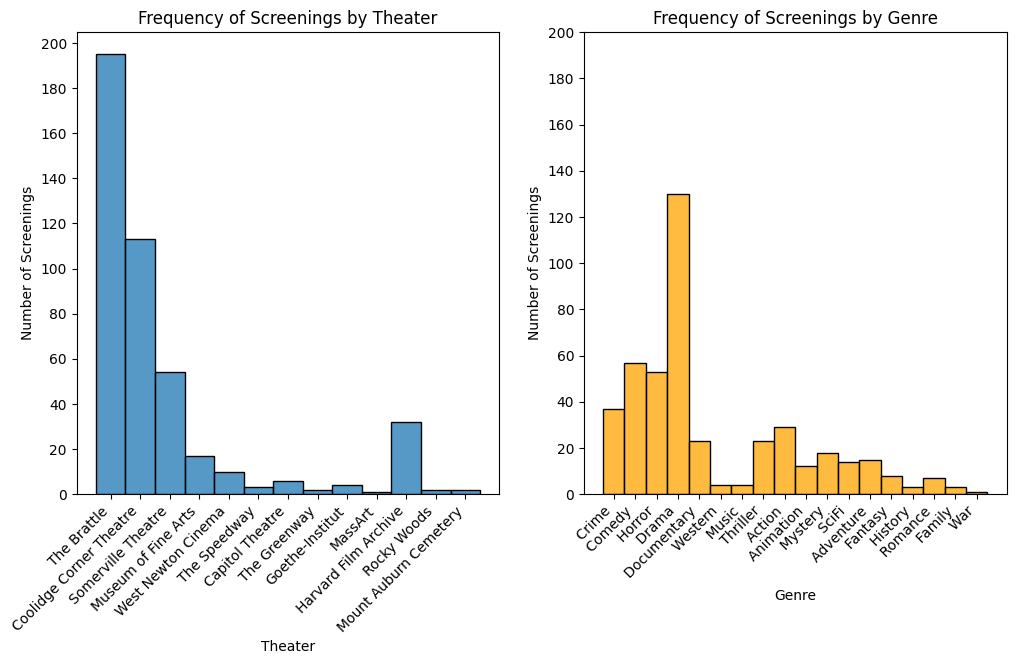

In [144]:
# 2. Screenings by theater & screenings by genre
# your code here

# filter out nonsensical genres
contains_numeric = df['genre'].str.contains(r'[0-9]', regex=True) #if contains numeric values
df_clean = df[~contains_numeric] # ~ negates condition

fig, axes = plt.subplots(1,2, figsize=(12, 6)) #create 2 subplots 1 row 2 columns (side by side)
sns.histplot(x='theater',data=df_clean, ax = axes[0])
sns.histplot(x='genre',data=df_clean, ax = axes[1], color='orange')

#put title on first plot of screenings by theater
axes[0].set_title('Frequency of Screenings by Theater')
axes[0].set_ylabel('Number of Screenings')
axes[0].set_xlabel('Theater')
axes[0].set_yticks(np.arange(0, 220, 20)) #set y ticks to set amount
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right') #orient correctly

#same for second plot
axes[1].set_title('Frequency of Screenings by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Number of Screenings')
axes[1].set_yticks(np.arange(0, 220, 20), ) #set y ticks to same as above

plt.xticks(rotation=45, ha='right') #avoid stacking of x ticks
plt.show()

Two theatres seem to dominate the rest in terms of screenings found on the website, at least for the snapshots that the API successfully gathered. On the other hand, one genre, drama, has far more screenings than the rest. The other genres are more evenly distributed than the number of screenings by theatre. This has implications for later questions as it may be possible to draw better conclusions when grouping by genre rather than theatre due to the more even sample size across number of screenings.



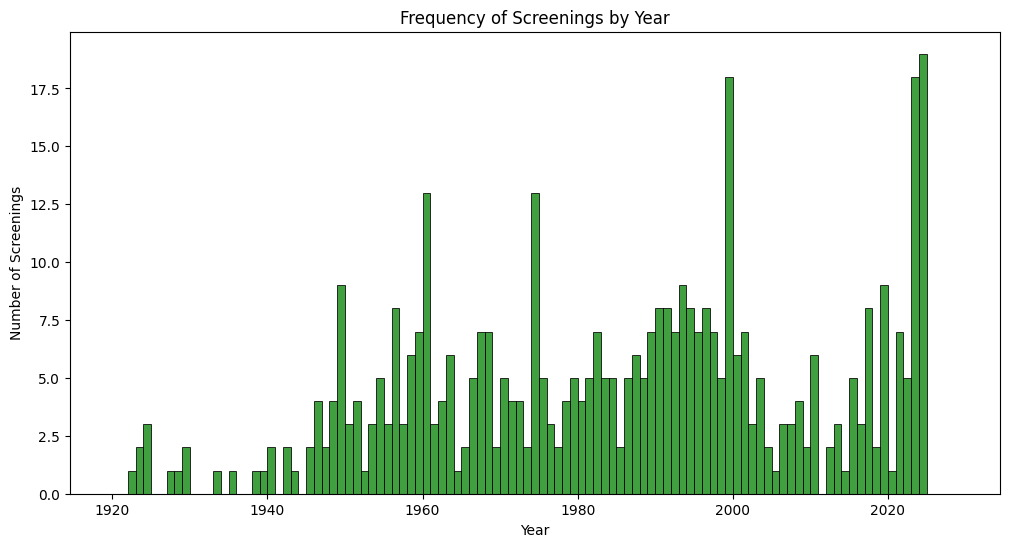

In [145]:
# 3. Year distribution & distribution of year by theater

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(x='year',data=df_clean, ax = ax, bins=range(1920, 2030, 1), color='green') #bins for each year
ax.set_title('Frequency of Screenings by Year')
ax.set_ylabel('Number of Screenings')
ax.set_xlabel('Year')
plt.show()

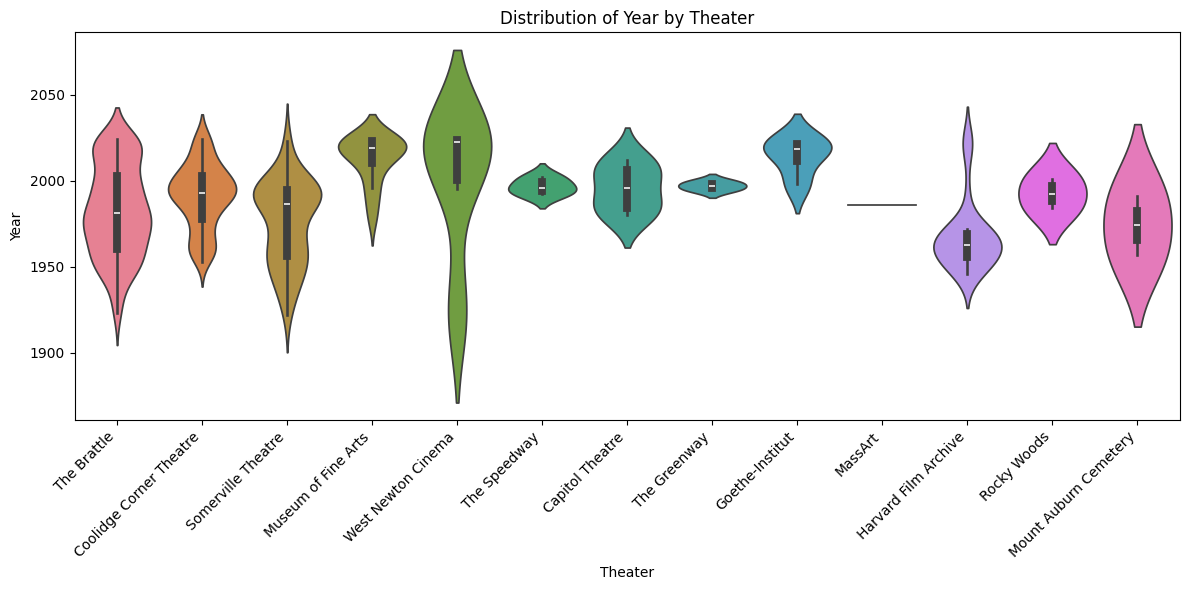

In [89]:
# year distribution by theatre
palette = sns.color_palette("Set2") # get color pallette

fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='theater', y='year', data=df_clean, ax=ax, hue='theater', legend=False)

ax.set_title('Distribution of Screenings Over the Years by Theater')
ax.set_xlabel('Theater')
ax.set_ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The first plot shows that the number of screenings on the website generally increased until about 2000, where the number of screenings dropped severely, and surpassed its previous peak in the last few years. The second plot shows that theatres do vary widely in yearly distribution. However, given the small sample size for screenings from theatres other than 'The Brattle' and 'Coolidge Corner Theatre', the results must be taken with a grain of salt as theatres with few screenings could have been subject to skew and bias. For instance, the violinplot shows that 'MassArt' only has 1 screening listed. Among the two most popular theatres on the website, 'The Brattle' seems to prefer more older movies than 'Coolidge Corner Theatre'.


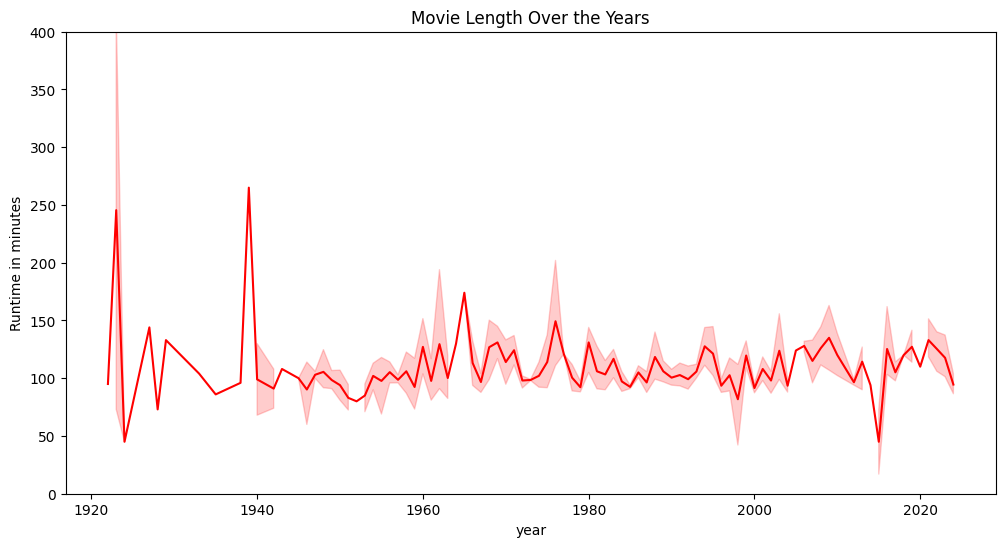

In [97]:
# 4.1 Custom question 1: how has movie length changed over the years? Has the mean or variability of runtime changed?

# approach: plot runtime in minutes vs year using in a linechart with a confidence interval shown to measure variability


fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='year', y=df_clean['runtime'].dt.total_seconds() / 60, data=df_clean, ax=ax, color='red')
ax.set_ybound(0, 400) #set y axis to minutes
ax.set_title('Movie Length Over the Years')
ax.set_ylabel('Runtime in minutes')

plt.show()


On average, there does not seem to be much change over time, and even the confidence interval did not fluctuate much. That being said, the earlier 1900s show more variation towards the longer end of runtime, and that is likely due to the smaller sample size of screenings shown from that time being less resistant to skew. Additionally, a potentially interesting finding is that the two largest peaks in yearly screenings, as shown in the green histogram above, occur soon after the two lowest points of the confidence interval in this line chart: Movie Length Over the Years. Could this mean that more movies become available to be shown at theatres if recently-made movies are shorters.


In [106]:
# 4.2 Does runtime vary by genre? If so, is this due to small sample size? Which genres contain outliers?

# approach: make 2 plots to visualize the overall distributions, showing variability and outliers in addition to means
# use value_counts to output sample size and determine which genres have real differences

#get list of all genres
movie_genres = df_clean['genre'].unique()

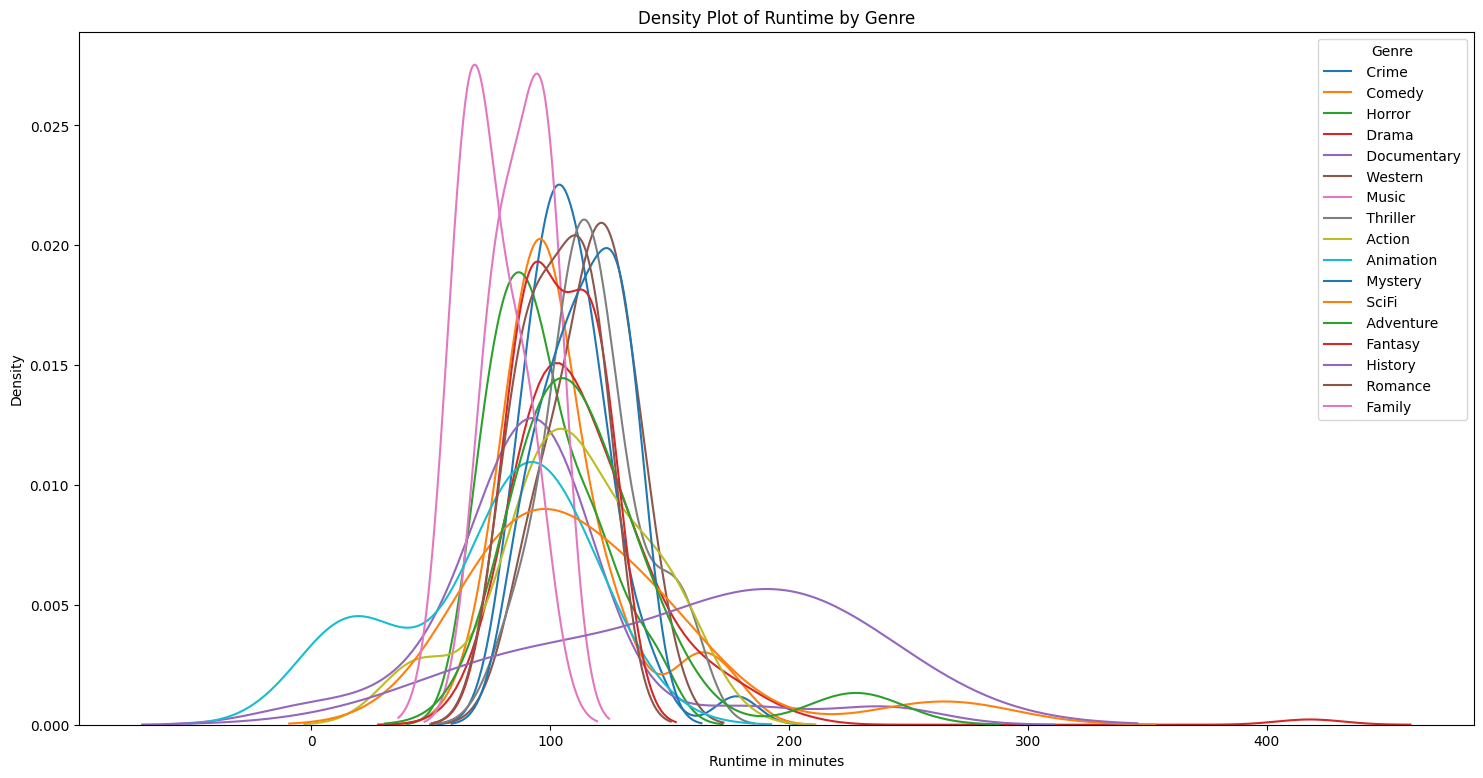

In [147]:
# try density plot
fig, ax = plt.subplots(figsize=(18, 9))

#loop through list and add to density plot for each genre - runtime conversion to minutes same as above
for g in movie_genres:
    sns.kdeplot(df_clean[df_clean['genre'] == g]['runtime'].dt.total_seconds() / 60, ax=ax, label=g, warn_singular=False, legend=True)
ax.set_title('Density Plot of Runtime by Genre')
ax.legend(title='Genre')
ax.set_xlabel('Runtime in minutes')
plt.show()

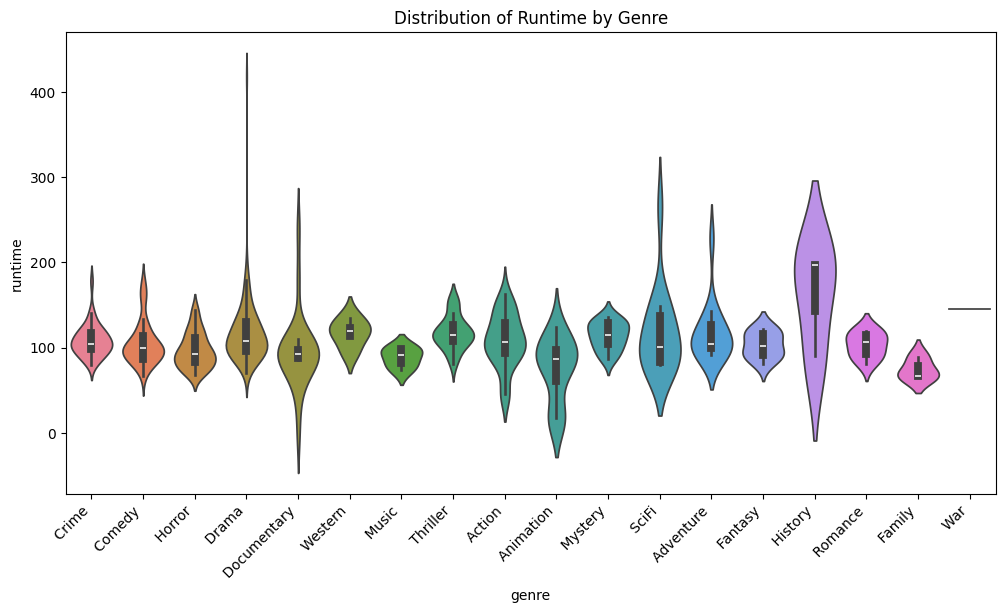

In [121]:
# most genres are around 100 minutes, but the above density plot may not paint the entire picture
# additionally, some genres have wider variance and a far lower sample size. 
# a violinplot may be more informative

fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='genre', y=df_clean['runtime'].dt.total_seconds() / 60, data=df_clean, ax=ax, hue='genre')
ax.set_title('Distribution of Runtime by Genre')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [146]:
df_clean['genre'].value_counts()

genre
Drama          130
Comedy          57
Horror          53
Crime           37
Action          29
Documentary     23
Thriller        23
Mystery         18
Adventure       15
SciFi           14
Animation       12
Fantasy          8
Romance          7
Western          4
Music            4
History          3
Family           3
War              1
Name: count, dtype: int64

Overall, history seems to have the highest average runtime as shown in the violin plot. Although, I personally think that the history and documentary category could be combined. Given this and history's small sample size of three, the violinplot shows, similarly to the density plot above, that there does not visually seem to be a significant difference in runtime based on the genre of the movie. Additionally, documentaries have the highest variance in runtime amongst the genres with a large enough sample size to draw conclusions. This makes logical sense as documentaries can be extremely long or short. Lastly, the largest outlier is in the 'Drama' genre, which has the largest sample size.



<div class=md>
    <h3>6. Get a film's Wikipedia page identifier</h3>

The screenboston page has relatively little information about each film.  But we can use some of the what we *do* know about each film to query Wikipedia for additional data.
<div class=prompt>
    
  Find a unique identifier for the Wikipedia page for each film and store it in a new 'wiki_id' column. This could be the URL itself or a unique page ID that will allow you to recover the URL. Display the head of your updated DataFrame and describe your approach. You should strive to find page identifiers for as many films as possible, but don't worry if you can't find them all. Shoot for at least 50%.
</div>

**Hints:**
- One way to do this is to construct a query string to that can be appended to wikipeda's search URL:<br>
<code>'https://en.wikipedia.org/w/index.php?search='`</code><br>
You could use movie info from your DataFrame to construct the query string. This could include the title, year, the fact that it is a film, etc. A unqiue identifier such as a URL or page ID can then be extracted from the approapriate search. 
- Feel free to explore wikipedia's API options as an alternative using the search URL.
- Depending on your implementation, this process could take anywhere from a few seconds to a few minutes. To avoid unnecessary requests (and waiting) you should once again write your results to a file and only make requests if this file does not already exist. This point won't be repeated any more in this assignment but you should follow this principle whenever possible to avoid repeating any long tasks or computations.
- Most of the time taken by a request is spend waiting for a response. Asynchronous requests allow you to initiate new requests without having to wait for the previous one to be returned. You can explore the asyncio and aiohttp libraries (imported above) if you'd like to optimize your code for speed. Just be warned that these are very deep topics in themselves so this should really just be an optimization step for the curious. To complicate matters, asyncio works slightly differently in Jupyter notebooks than in Python scripts. Finally, making too many requests too quickly can cause some to fail or may even result in your IP being temporarily blocked by a server.

</div>

In [150]:
def uniqueIdentifier(movieElement):
    titleNew = movieElement.title.replace(" ", "_").encode('latin1').decode('utf-8')
    director = movieElement.directors.split(",")
    directorNew = director[0]
    
    checkIfMultiple = requests.get(f"https://en.wikipedia.org/w/api.php?action=parse&page={titleNew}&format=json")

    if "The page you specified doesn't exist." not in checkIfMultiple.text:
        convertCheckIfMultiple = checkIfMultiple.json()['parse']['text']['*']
        checkAnswer = (directorNew in convertCheckIfMultiple) and ("Plot" in convertCheckIfMultiple) and ("Production" in convertCheckIfMultiple) and ("Box Office" in convertCheckIfMultiple)

        if checkAnswer:
            titleNewOne = movieElement.title.replace(" ", "+")
            ID = f"https://en.wikipedia.org/w/index.php?search={titleNewOne}"
        else:
            titleNewTwo = movieElement.title.replace(" ","+")
            ID = f"https://en.wikipedia.org/w/index.php?search={titleNewTwo}+(film)"

        return ID
    

    

IDList = []
for i in range(df.shape[0]):
    IDList.append(uniqueIdentifier(df.iloc[i]))
    
df['wiki_id'] = IDList
df.head()


,title,directors,year,genre,runtime,theater,screen_date,screen_times,wiki_id
114,Ghost Dog: The Way of the Samurai,Jim Jarmusch,1999,Crime,0 days 01:56:00,The Brattle,2024-05-24,4:00 PM 9:00 PM,https://en.wikipedia.org/w/index.php?search=Gh...
115,Stray Dog,Akira Kurosawa,1949,Crime,0 days 02:02:00,The Brattle,2024-05-24,6:30 PM,https://en.wikipedia.org/w/index.php?search=St...
116,Big Trouble in Little China,John Carpenter,1986,Comedy,0 days 01:40:00,Coolidge Corner Theatre,2024-05-24,11:59 PM,https://en.wikipedia.org/w/index.php?search=Bi...
124,Ring,Hideo Nakata,1998,Horror,0 days 01:36:00,Somerville Theatre,2024-05-25,11:59 PM,https://en.wikipedia.org/w/index.php?search=Ri...
123,Black Rain,Ridley Scott,1989,Drama,0 days 02:05:00,Coolidge Corner Theatre,2024-05-25,11:59 PM,https://en.wikipedia.org/w/index.php?search=Bl...


In [151]:
# Display results of updated df
missing_rows = df[df.wiki_id.isna()]
num_wiki_id_na = missing_rows.shape[0]
print("Number of screenings missing a wiki ID:", num_wiki_id_na)
if num_wiki_id_na > 0:
    print("Example rows with missing wiki ID")
    display.display(missing_rows)

Number of screenings missing a wiki ID: 24
Example rows with missing wiki ID


,title,directors,year,genre,runtime,theater,screen_date,screen_times,wiki_id
143,Return to Reason: Four Films by Man Ray,Man Ray,2024,Drama,0 days 01:10:00,The Brattle,2024-05-31,4:30 PM 9:00 PM,None
159,Prince: Sign O' the Times,Prince,1987,Music,0 days 01:24:00,The Brattle,2024-06-06,4:30 PM 9:00 PM,None
184,Never Open That Door,Carlos Hugo Christensen,1952,Drama,0 days 01:20:00,The Brattle,2024-06-14,7:00 PM,None
215,8 Days in August,Samuel Perriard,2024,Comedy,0 days 01:30:00,Coolidge Corner Theatre,2024-06-23,11:00 AM,None
1823,The Rose King,Werner Schroeter,1986,Drama,0 days 01:46:00,MassArt,2024-09-11,4:30 PM,None
1874,Naked Acts,Bridgett M. Davis,1996,Comedy,0 days 01:27:00,The Brattle,2024-09-20,8:00 PM,None
1878,Naked Acts,Bridgett M. Davis,1996,Comedy,0 days 01:27:00,The Brattle,2024-09-21,7:00 PM,None
1881,Beyond the Blue Border,Sarah Neumann,2024,Drama,0 days 01:42:00,Coolidge Corner Theatre,2024-09-22,11:00 AM,None
1882,Naked Acts,Bridgett M. Davis,1996,Comedy,0 days 01:27:00,The Brattle,2024-09-22,12:30 PM 5:00 PM 7:00 PM,None
7,I'm Not The River Jhelum,Prabhash Chandra,2021,1h 36m,0 days 01:36:00,MassArt,2024-09-25,5:00 PM,None


*your answer here*



In [152]:
grader.check("q6")

q6 results: All test cases passed!

<div class='md'>
    
<h3>7. Acquire HTML from wiki page and store in DataFrame</h3>

<div class=prompt>
    
Use `'wiki_id'` to acquire the HTML content of each film's Wikipedia page and store it in a new column called `'wiki_html'`.
</div>
</div>

In [155]:
# create a function that uses requests to get HTML from wiki_id
def fetch_html(wiki_id):
    try:
        response = requests.get(wiki_id) #HTTP request
        response.raise_for_status() # raise exception if error
        return response.text 
    
    except requests.RequestException as e:
        print(f"Request did not work due to {e} ")
        return None

In [158]:
# loop over all rows and append to wiki_html[]
wiki_html = []
for i in range(df.shape[0]):
    wiki_html.append(fetch_html(df.iloc[i]['wiki_id']))

# add list of htmls to df
df['wiki_html'] = wiki_html
df.head()


Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https://None? 
Request did not work due to Invalid URL 'None': No scheme supplied. Perhaps you meant https

,title,directors,year,genre,runtime,theater,screen_date,screen_times,wiki_id,wiki_html
114,Ghost Dog: The Way of the Samurai,Jim Jarmusch,1999,Crime,0 days 01:56:00,The Brattle,2024-05-24,4:00 PM 9:00 PM,https://en.wikipedia.org/w/index.php?search=Gh...,"<!DOCTYPE html>\n<html class=""client-nojs vect..."
115,Stray Dog,Akira Kurosawa,1949,Crime,0 days 02:02:00,The Brattle,2024-05-24,6:30 PM,https://en.wikipedia.org/w/index.php?search=St...,"<!DOCTYPE html>\n<html class=""client-nojs vect..."
116,Big Trouble in Little China,John Carpenter,1986,Comedy,0 days 01:40:00,Coolidge Corner Theatre,2024-05-24,11:59 PM,https://en.wikipedia.org/w/index.php?search=Bi...,"<!DOCTYPE html>\n<html class=""client-nojs vect..."
124,Ring,Hideo Nakata,1998,Horror,0 days 01:36:00,Somerville Theatre,2024-05-25,11:59 PM,https://en.wikipedia.org/w/index.php?search=Ri...,"<!DOCTYPE html>\n<html class=""client-nojs vect..."
123,Black Rain,Ridley Scott,1989,Drama,0 days 02:05:00,Coolidge Corner Theatre,2024-05-25,11:59 PM,https://en.wikipedia.org/w/index.php?search=Bl...,"<!DOCTYPE html>\n<html class=""client-nojs vect..."


In [159]:
# Display results of updated df
missing_rows = df[df.wiki_html.isna()]
num_wiki_html_na = missing_rows.shape[0]
print("Number of screenings missing wiki HTML:", num_wiki_html_na)
if num_wiki_html_na > 0:
    print("Example rows with missing wiki HTML")
    display.display(missing_rows)

Number of screenings missing wiki HTML: 24
Example rows with missing wiki HTML


,title,directors,year,genre,runtime,theater,screen_date,screen_times,wiki_id,wiki_html
143,Return to Reason: Four Films by Man Ray,Man Ray,2024,Drama,0 days 01:10:00,The Brattle,2024-05-31,4:30 PM 9:00 PM,None,None
159,Prince: Sign O' the Times,Prince,1987,Music,0 days 01:24:00,The Brattle,2024-06-06,4:30 PM 9:00 PM,None,None
184,Never Open That Door,Carlos Hugo Christensen,1952,Drama,0 days 01:20:00,The Brattle,2024-06-14,7:00 PM,None,None
215,8 Days in August,Samuel Perriard,2024,Comedy,0 days 01:30:00,Coolidge Corner Theatre,2024-06-23,11:00 AM,None,None
1823,The Rose King,Werner Schroeter,1986,Drama,0 days 01:46:00,MassArt,2024-09-11,4:30 PM,None,None
1874,Naked Acts,Bridgett M. Davis,1996,Comedy,0 days 01:27:00,The Brattle,2024-09-20,8:00 PM,None,None
1878,Naked Acts,Bridgett M. Davis,1996,Comedy,0 days 01:27:00,The Brattle,2024-09-21,7:00 PM,None,None
1881,Beyond the Blue Border,Sarah Neumann,2024,Drama,0 days 01:42:00,Coolidge Corner Theatre,2024-09-22,11:00 AM,None,None
1882,Naked Acts,Bridgett M. Davis,1996,Comedy,0 days 01:27:00,The Brattle,2024-09-22,12:30 PM 5:00 PM 7:00 PM,None,None
7,I'm Not The River Jhelum,Prabhash Chandra,2021,1h 36m,0 days 01:36:00,MassArt,2024-09-25,5:00 PM,None,None


In [160]:
grader.check("q7")

q7 results: All test cases passed!

<div class=md>

<h3>8. Adding Data from Wikipedia and Asking New Questions</h3>

Now that we have Wikipedia pages for most or all of our movies, we can add supplemental data from those pages to our DataFrame, ask new questions, and use Pandas and visualizations to try and get some answers. This final section is very open-ended, and you are encouraged to experiment. We want to see what you can do!

<div class='prompt'>

1. **Data Extraction and Integration**
   - Extract at least one new piece of data from each movie page you found.
   - Add this data as a new column(s) to your DataFrame.
   - Display the head of your updated DataFrame.
   - Discuss your strategy for extracting the new data, including any challenges you faced and how you overcame them.

2. **Data Analysis and Visualization**
    - Formulate at least two new questions that involve the Wikipedia data you've added.
    - For each question:
      - Clearly state your question and why it's interesting or relevant.
      - Describe your approach to answering the question.
      - Use Pandas to manipulate and analyze the data as needed.
      - Create at least one meaningful visualization that helps answer your question.
      - Ensure your plots are well-labeled and easy to interpret.
      - Interpret the results of your analysis, discussing any insights, patterns, or surprises you discovered.

</div>

**Hints:**
- The 'info box' on the right side of most Wikipedia pages is fairly standardized across film pages. This might be the easiest place to start.
- Some potential pieces of data to extract include the language of the film, its box office revenue or budget, the starring cast, etc.
- Feel free to extract more than just a single new piece of data to use in your analysis. If you're feeling particularly adventurous, you can even jump from the film page to other linked pages to acquire more data!
- Consider how the new data you've extracted might relate to the screening information you already have. Are there interesting connections or patterns to explore?

Remember, the goal is to demonstrate your ability to ask insightful questions, use appropriate data science techniques to answer them, and effectively communicate your findings.
</div>

In [163]:
# 1. Data Extraction and Integration
# your code here
pd.set_option('display.max_colwidth', None) #display full hyperlinks to movies - avoid truncated output
df.iloc[:4]['wiki_id']

114    https://en.wikipedia.org/w/index.php?search=Ghost+Dog:+The+Way+of+the+Samurai
115                     https://en.wikipedia.org/w/index.php?search=Stray+Dog+(film)
116          https://en.wikipedia.org/w/index.php?search=Big+Trouble+in+Little+China
124                          https://en.wikipedia.org/w/index.php?search=Ring+(film)
Name: wiki_id, dtype: object

In [175]:
# ideas: could extract box office (or anything in info box)



In [176]:
# 2. Data Analysis and Visualization
# your code here


*your answer here*



<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

*your answer here*



In [ ]:
hours_spent_on_hw = ...

In [ ]:
grader.check("wrapup")

In [ ]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

🌈 **This concludes HW1. Thank you!**